## Business Analytics

## Swapnil Adnak

#### In this section,we will perform Exploratory Data Analysis in the business view of the owner of retail firm
#### Given dataset is a sample store dataset with different attributes of particular instance of the product

In [8]:
# Importing all libraries required for this task
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:
#reding the dataset of sample store
df=pd.read_csv('SampleSuperstore.csv')

In [10]:
#Few rows of required dataset
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
#Datatypes of the all features 
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [12]:
#Inspecting all featurs with some more details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [13]:
#Statistical analyis of data
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [14]:
# Unique values and their counts in respective columns of dataframe
for i in df.columns:
    if df[i].dtypes=='object':
        print('Column: ',i)
        print()
        print(df[i].value_counts())
        print('----------------------')

Column:  Ship Mode

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
----------------------
Column:  Segment

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64
----------------------
Column:  Country

United States    9994
Name: Country, dtype: int64
----------------------
Column:  City

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Cedar Rapids       1
Yucaipa            1
Billings           1
Elyria             1
Romeoville         1
Name: City, Length: 531, dtype: int64
----------------------
Column:  State

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Vi

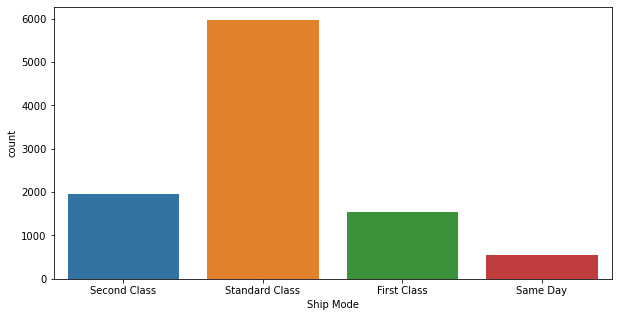

In [15]:
#Univariate analysis
plt.figure(figsize=(10,5))
sns.countplot(df['Ship Mode'])

We can see that in the "Ship Mode" column "Standard Class" has more counts and "Same Day" has less count.
"Second Class" and "First Class" has the some-what similar counts

In [16]:
# Aggregating profit according to the Ship mode
kk=df.groupby(['Ship Mode'],as_index=False)['Profit'].sum()

## Ship Mode wise profit of respective stores

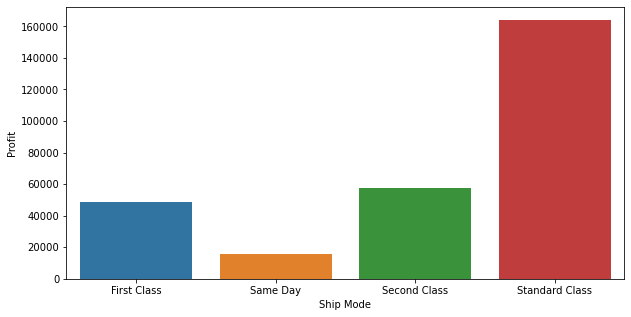

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(kk['Ship Mode'],kk['Profit'])

As we can see that as "Standard Class" has the more count that's why it implies more profit level.and in the same way "Same Day" has the less profit.But "Second Class" has the lesser count but inspite of this it's profit level is more
as compared to "First Class" 

## Sales according to Segment and Ship mode

In [18]:
df.groupby(['Ship Mode','Segment'],as_index=False)['Sales'].mean() 

,Ship Mode,Segment,Sales
0,First Class,Consumer,206.981749
1,First Class,Corporate,218.264886
2,First Class,Home Office,304.228831
3,Same Day,Consumer,191.155707
4,Same Day,Corporate,395.801079
5,Same Day,Home Office,202.191455
6,Second Class,Consumer,226.959755
7,Second Class,Corporate,239.944234
8,Second Class,Home Office,258.128421
9,Standard Class,Consumer,230.190299


We have grouped "Ship Mode" and "Segment" and with respective to that we have aggregated them my average.
And as a result the most profitable combination is Ship mode of "Same Day" and Segment of "Corporate"

## State and it's respective sales with profit

In [19]:
now=df.groupby(['State'],as_index=False)['Sales','Profit'].mean().sort_values(by=['Sales','Profit']).tail()

In [20]:
now

,State,Sales,Profit
24,Montana,372.623467,122.221900
37,Rhode Island,404.070643,130.100523
26,Nevada,428.951333,85.045279
43,Vermont,811.760909,204.088936
48,Wyoming,1603.136000,100.196000


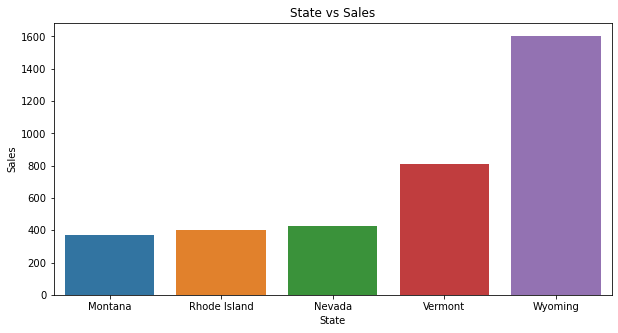

In [21]:
plt.figure(figsize=(10,5))
plt.title('State vs Sales')
sns.barplot(x='State',y='Sales',data=now)

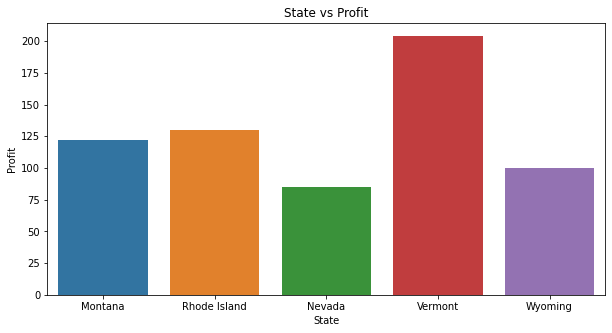

In [22]:
plt.figure(figsize=(10,5))
plt.title('State vs Profit')
sns.barplot(x='State',y='Profit',data=now)

We can see that "Montana" State has the grater Sales as compared to the other states,but it's profit does not seems to be best as compared to the other states.

## Regional profit level

In [23]:
#Aggregating average of "Profit" according to the "Region"
df.groupby(['Region'])['Profit'].mean()

Region
Central    17.092709
East       32.135808
South      28.857673
West       33.849032
Name: Profit, dtype: float64

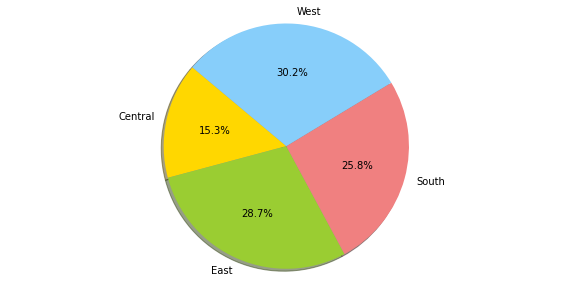

In [24]:
plt.figure(figsize=(10,5))
labels = 'Central', 'East', 'South', 'West'
sizes = [17.09, 32.13,28.85,33.84]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

The above pie chart clearly shows that "West" region of whole United states has the more profit as compared to
other regions.It's necessary to give more attention to the "Central" region of USA as it has very less percentage profit.

In [25]:
#Category and sub-category wise average of sales
da=df.groupby(['Category','Sub-Category'],as_index=False)['Sales'].mean().sort_values(by=['Sales'])

In [26]:
da

,Category,Sub-Category,Sales
8,Office Supplies,Fasteners,13.936774
5,Office Supplies,Art,34.068834
9,Office Supplies,Labels,34.303055
10,Office Supplies,Paper,57.284092
7,Office Supplies,Envelopes,64.867724
2,Furniture,Furnishings,95.825668
6,Office Supplies,Binders,133.560560
13,Technology,Accessories,215.974604
4,Office Supplies,Appliances,230.755710
12,Office Supplies,Supplies,245.650200


Above we have "category" and it's respective "sub category" of product,like Furniture is category and Chairs,tables are sub categories of that.
As we can see in Technology category Copiers ahs the larger sales as compared to the whole categories and sub categories.
And much lesser is of Office Supplies category and Fastensers sub cateogory

## Overall discount state in respective to the Profit

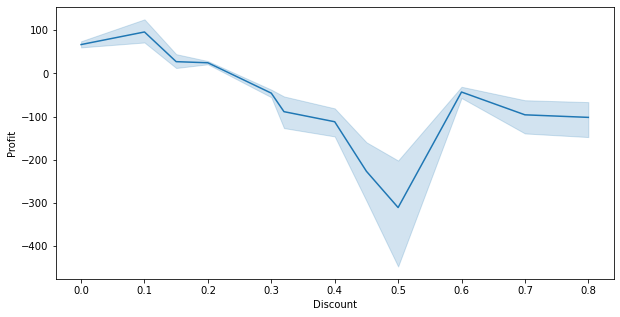

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(df['Discount'],df['Profit'])

## The cities which are in major loss

In [28]:
df[df['Profit']<0][['City','Profit']].groupby(['City'])['Profit'].mean().sort_values().head(6)

City
Burlington    -1499.832950
Concord        -943.303200
Louisville     -461.763062
Round Rock     -408.353467
Lancaster      -381.624730
Clarksville    -363.860800
Name: Profit, dtype: float64

In above statement,firstly I take the complete dataset having profit negative that meance loss , then I grouped that data 
into the "city" feature so as to get particular cities.

I then aggregated "Profit" according to the cities I have grouped above. Since we took only cities which are in loss.
We have then top 6 cities which are in major loss. If we want more cities we can do that. 

Neglecting "-" sign we have Burlington city at the top among others.("-" only indicates loss)

In [29]:
df.groupby(['City'])['Discount'].mean().sort_values().tail(6)

City
Pensacola        0.7
Littleton        0.7
Romeoville       0.8
Missouri City    0.8
Abilene          0.8
Deer Park        0.8
Name: Discount, dtype: float64

Here we have neglecting sales and profit of certain cities,first few cities which are at the top for giving discount accordingly.

#### As a summary I can mention cities which need more supervising and states,categories and sub categories for the same.



1:  As "Ship Mode" taking into the account, Standard Class has more profit level but it may be due to it's more count

2:  When we analyse sales with respective to the Ship Mode and Segment, "Same Day" and "Corporate" this combination has the  
    more Sales as of others
    
3: In all the states "Wyoming" has the most sales average but have not that much of Profit as compared to the other states

4: There are mainly four regions in our data "Central","West","South","East",out of these when we analyse profit,"West" has        nearly  30.2 % of overall profit

5: In category of "Technology" and Sub category of "Copiers" has largest sales but office supplies and sub category of  
   Fasteners needs more supervising